In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.aer import QasmSimulator
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')
from qiskit.quantum_info import Statevector
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from numpy import pi

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [23]:
# Message to be transmitted
m = "11"

In [24]:
# Transmitter Circuit

t = QuantumCircuit(2, 2)

t.h(1)
t.z(0)
t.cx(1,0)

if m[-2]=='1':
    t.z(1)
if m[-1]=='1':
    t.x(1)

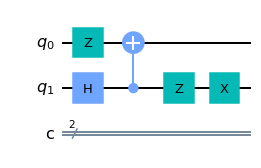

In [25]:
t.draw()

In [26]:
ket = Statevector(t)
ket.draw()

'Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,\n              0.        +0.j],\n            dims=(2, 2))'

In [27]:
# Reciever Circuit

r = QuantumCircuit(2,2)

r.cx(1,0)
r.h(1)
r.z(0)

r.measure([0,1],[0,1])

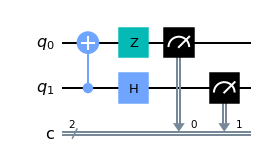

In [28]:
r.draw()

In [29]:
backend.run(t.compose(r)).result().get_counts()

{'11': 1024}